### k-means clustering

In [1]:
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [2]:
import scipy as sc
import scipy.stats as stats
from scipy.spatial.distance import euclidean
import numpy as np
import pandas as pd

In [4]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

plt.style.use('fivethirtyeight')

plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.serif'] = 'Ubuntu'
plt.rcParams['font.monospace'] = 'Ubuntu Mono'
plt.rcParams['font.size'] = 10
plt.rcParams['axes.labelsize'] = 10
plt.rcParams['axes.labelweight'] = 'bold'
plt.rcParams['axes.titlesize'] = 10
plt.rcParams['xtick.labelsize'] = 8
plt.rcParams['ytick.labelsize'] = 8
plt.rcParams['legend.fontsize'] = 10
plt.rcParams['figure.titlesize'] = 12
plt.rcParams['image.cmap'] = 'jet'
plt.rcParams['image.interpolation'] = 'none'
plt.rcParams['figure.figsize'] = (16, 8)
plt.rcParams['lines.linewidth'] = 2
plt.rcParams['lines.markersize'] = 8

colors = ['#008fd5', '#fc4f30', '#e5ae38', '#6d904f', '#8b8b8b', '#810f7c', 
'#137e6d', '#be0119', '#3b638c', '#af6f09', '#008fd5', '#fc4f30', '#e5ae38', '#6d904f', '#8b8b8b', 
'#810f7c', '#137e6d', '#be0119', '#3b638c', '#af6f09']

cmap = mcolors.LinearSegmentedColormap.from_list("", ["#82cafc", "#069af3", "#0485d1", colors[0], colors[8]])

Genera dataset sia in termini di elementi $x$ che di variabili latenti associate (cluster di appartenenza) $z$

In [27]:
mu0 = [3, 3]
mu1 = [1.5, 1]
mu2 = [0, 1.2]
mu3 = [3.2, 1]
Sigma0 = [[.3, .3],[.3,.4]]
Sigma1 = [[.5, -.5],[-.5,.7]]
Sigma2 = [[.15, .1],[.1,.3]]
Sigma3 = [[.2, 0],[0,.1]]


rv0 = stats.multivariate_normal(mean=mu0, cov=Sigma0)
rv1 = stats.multivariate_normal(mean=mu1, cov=Sigma1)
rv2 = stats.multivariate_normal(mean=mu2, cov=Sigma2)
rv3 = stats.multivariate_normal(mean=mu3, cov=Sigma3)

z0 = np.ones(300)
z1 = np.ones(300)*2
z2 = np.ones(300)*3
z3 = np.ones(300)*4
x0 = rv0.rvs(size=300)
x1 = rv1.rvs(size=300)
x2 = rv2.rvs(size=300)
x3 = rv3.rvs(size=300)

z=np.concatenate((z0, z1, z2, z3), axis=0)
x=np.concatenate((x0, x1, x2, x3), axis=0)

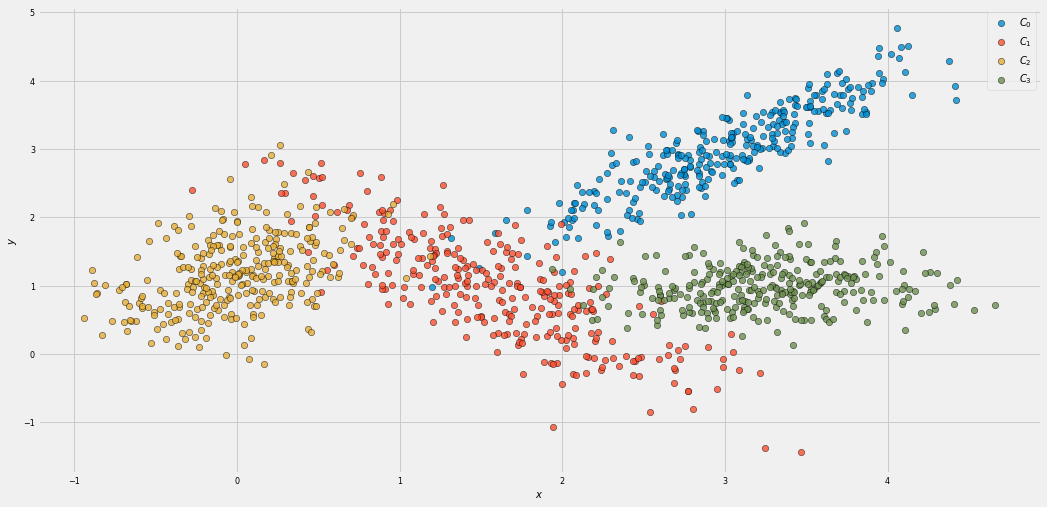

In [29]:
fig, ax = plt.subplots()
ax.scatter(x0[:,0], x0[:,1], s=40, color='C0', alpha =.8, edgecolors='k', label=r'$C_0$')
ax.scatter(x1[:,0], x1[:,1], s=40, color='C1', alpha =.8, edgecolors='k', label=r'$C_1$')
ax.scatter(x2[:,0], x2[:,1], s=40, color='C2', alpha =.8, edgecolors='k', label=r'$C_2$')
ax.scatter(x3[:,0], x3[:,1], s=40, color='C3', alpha =.8, edgecolors='k', label=r'$C_3$')
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.legend()
plt.show()

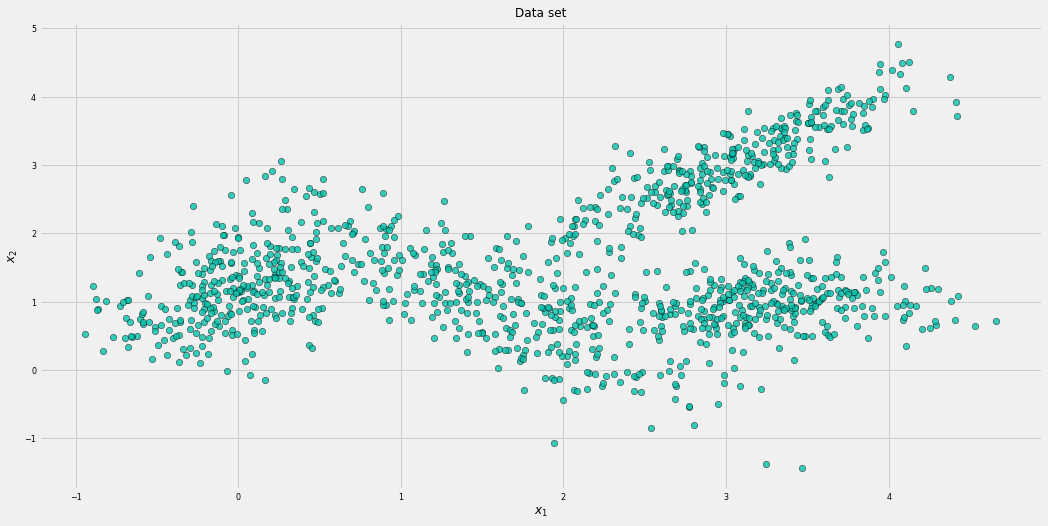

In [30]:
cc='xkcd:turquoise'
fig = plt.figure(figsize=(16,8))
ax = fig.gca()
plt.scatter(x[:,0], x[:,1], s=40, color=cc, edgecolors='k', alpha=.8)
plt.ylabel('$x_2$', fontsize=12)
plt.xlabel('$x_1$', fontsize=12)
plt.title('Data set', fontsize=12)
plt.show()

In [ ]:
# Number of clusters
nc = 3

Genera posizione iniziale centroidi

In [160]:
# X coordinates of random centroids
C_x = np.random.sample(nc)*(np.max(x[:,0])-np.min(x[:,0]))*.7+np.min(x[:,0])*.7
# Y coordinates of random centroids
C_y = np.random.sample(nc)*(np.max(x[:,1])-np.min(x[:,1]))*.7+np.min(x[:,0])*.7
centroids = np.array(list(zip(C_x, C_y)), dtype=np.float32)

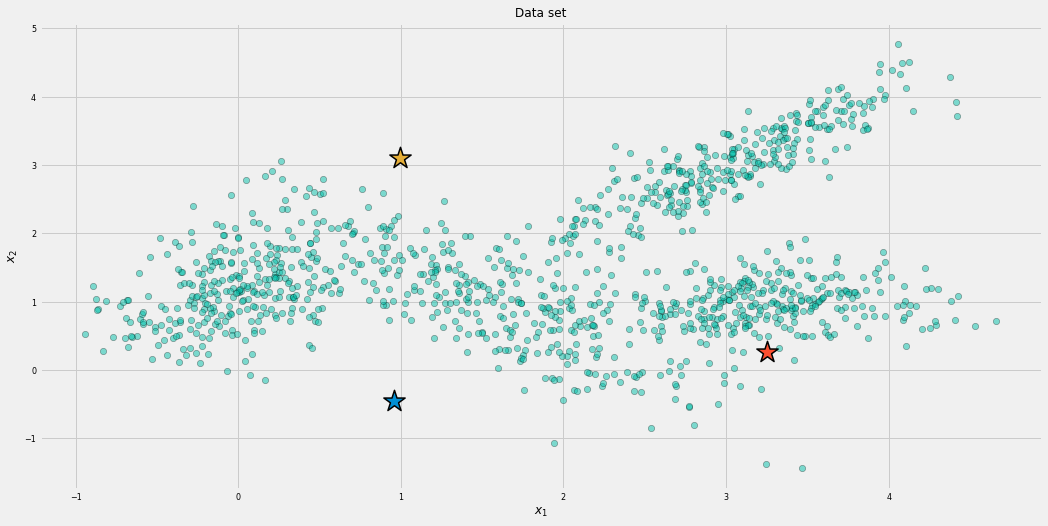

In [161]:
fig = plt.figure(figsize=(16,8))
ax = fig.gca()
plt.scatter(x[:,0], x[:,1], s=40, color=cc, edgecolors='k', alpha=.5)
for i in range(nc):
    plt.scatter(centroids[i,0], centroids[i,1], marker='*', s=500, c=colors[i], edgecolors='k', linewidth=1.5)
plt.ylabel('$x_2$', fontsize=12)
plt.xlabel('$x_1$', fontsize=12)
plt.title('Data set', fontsize=12)
plt.show()

In [162]:
centroid_list = []
clustering_list = []
error_list = []

In [163]:
centroid_list.append(centroids)
clustering = np.zeros(x.shape[0])
sum_dist = 0
for i in range(x.shape[0]):
    distances = [euclidean(x[i], centroids[j]) for j in range(nc)]
    cluster = np.argmin(distances)
    clustering[i] = cluster
    sum_dist += euclidean(x[i], centroids[cluster])
clustering_list.append(clustering)
error_list.append(sum_dist)

In [164]:
for l in range(20):
    centroids = np.array([[0.0,0.0], [0.0,0.0], [0.0,0.0]])
    clustering = np.zeros(x.shape[0])
    sum_dist = 0
    # Finding the new centroids by taking the average value
    for cluster_index in range(nc):
        points = [x[i] for i in range(x.shape[0]) if clustering_list[-1][i] == cluster_index]
        centroids[cluster_index] = np.mean(points, axis=0)
    centroid_list.append(centroids)
    # Assigning each value to its closest cluster
    for i in range(x.shape[0]):
        distances = [euclidean(x[i], centroids[j]) for j in range(nc)]
        cluster = np.argmin(distances)
        clustering[i] = cluster
        sum_dist += euclidean(x[i,:], centroids[cluster])
    clustering_list.append(clustering)
    error_list.append(sum_dist)
    

In [166]:
centroid_history = np.array(centroid_list)
clustering_history = np.array(clustering_list)

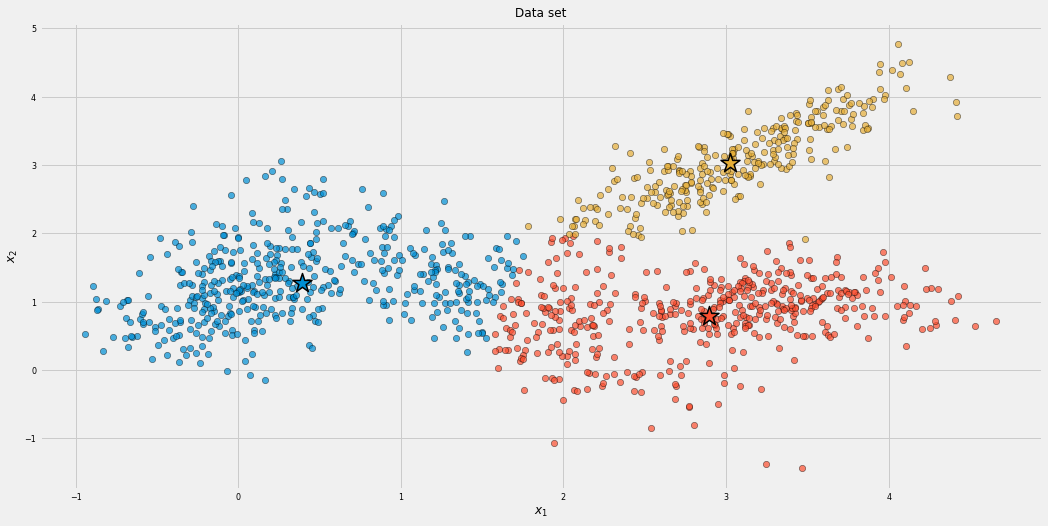

In [176]:
step = 3
fig = plt.figure(figsize=(16,8))
ax = fig.gca()
clustering, centroids = clustering_history[step], centroid_history[step]
for cl in range(nc):
    x_ = x[clustering==cl]
    plt.scatter(x_[:,0],x_[:,1], c=colors[cl], marker='o', s=40, edgecolors='k', alpha=.7)

for i in range(nc):
    plt.scatter(centroids[i,0], centroids[i,1], marker='*', s=400, c=colors[i], edgecolors='k', linewidth=1.5)
plt.ylabel('$x_2$', fontsize=12)
plt.xlabel('$x_1$', fontsize=12)
plt.title('Data set', fontsize=12)
plt.show()

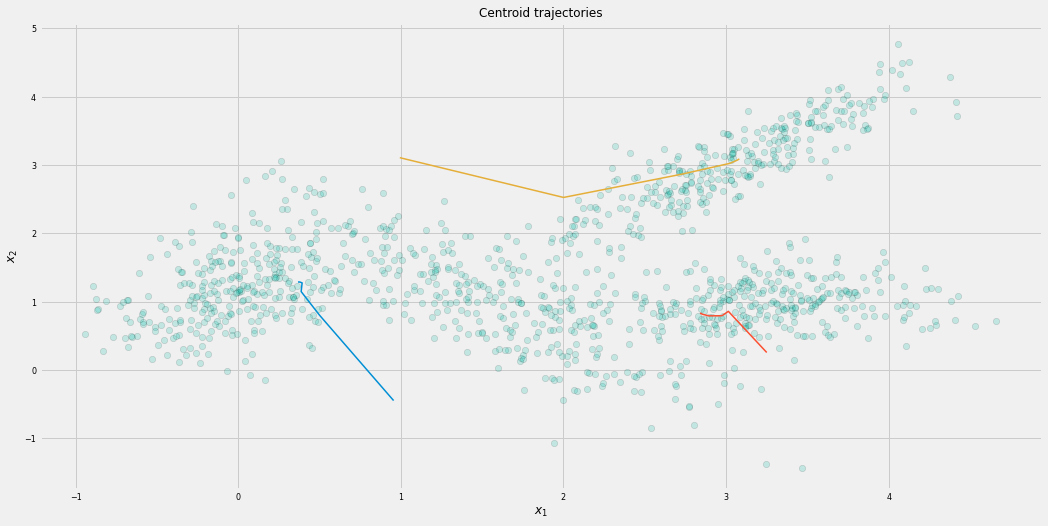

In [194]:
fig = plt.figure(figsize=(16,8))
ax = fig.gca()
plt.scatter(x[:,0], x[:,1], s=40, color=cc, edgecolors='k', alpha=.2)
for cl in range(nc):
    plt.plot(centroid_history[:,cl,0], centroid_history[:,cl,1], c=colors[cl], linewidth=1.5)
plt.ylabel('$x_2$', fontsize=12)
plt.xlabel('$x_1$', fontsize=12)
plt.title('Centroid trajectories', fontsize=12)
plt.show()

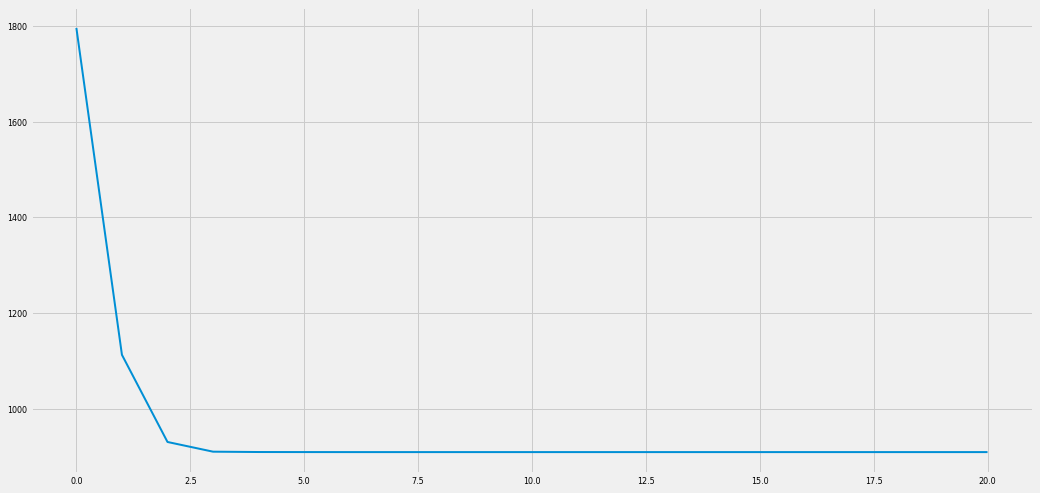

In [195]:
plt.plot(error_list)